In [1]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 68kB/s 
     |████████████████████████████████| 491kB 25.3MB/s 
     |████████████████████████████████| 3.2MB 36.2MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


# Predicción de precio de venta de una casa

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests

In [0]:
session = tf.Session()

In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
housing_header = ["CRIM", #      per capita crime rate by town
                  "ZN", #        proportion of residential land zoned for lots over 25,000 sq.ft.
                  "INDUS", #     proportion of non-retail business acres per town
                  "CHAS", #      Charles River dummy variable (= 1 if tract bounds  river; 0 otherwise)
                  "NOX", #       nitric oxides concentration (parts per 10 million)
                  "RM", #        average number of rooms per dwelling
                  "AGE",#        proportion of owner-occupied units built prior to 1940
                  "DIS", #       weighted distances to five Boston employment centres
                  "RAD", #       index of accessibility to radial highways
                  "TAX", #       full-value property-tax rate per $10,000
                  "PTRATIO",#    pupil-teacher ratio by town
                  "B", #         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                  "LSTAT", #     % lower status of the population
                  "MEDV" #       Median value of owner-occupied homes in $1000's
                 ]

In [0]:
cols_used = ["CRIM", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"]
num_features = len(cols_used)

In [0]:
housing_file = requests.get(url)

In [41]:
housing_file.text

' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00\n 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60\n 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70\n 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40\n 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20\n 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70\n 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90\n 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10\n 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50\n 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10  18.90\n 0.22489  12.50   7

In [0]:
housing_data =[[float(x) for x in y.split(' ') if len(x)>=1] for y in housing_file.text.split('\n') if len(y)>=1]

In [43]:
housing_data

[[0.00632,
  18.0,
  2.31,
  0.0,
  0.538,
  6.575,
  65.2,
  4.09,
  1.0,
  296.0,
  15.3,
  396.9,
  4.98,
  24.0],
 [0.02731,
  0.0,
  7.07,
  0.0,
  0.469,
  6.421,
  78.9,
  4.9671,
  2.0,
  242.0,
  17.8,
  396.9,
  9.14,
  21.6],
 [0.02729,
  0.0,
  7.07,
  0.0,
  0.469,
  7.185,
  61.1,
  4.9671,
  2.0,
  242.0,
  17.8,
  392.83,
  4.03,
  34.7],
 [0.03237,
  0.0,
  2.18,
  0.0,
  0.458,
  6.998,
  45.8,
  6.0622,
  3.0,
  222.0,
  18.7,
  394.63,
  2.94,
  33.4],
 [0.06905,
  0.0,
  2.18,
  0.0,
  0.458,
  7.147,
  54.2,
  6.0622,
  3.0,
  222.0,
  18.7,
  396.9,
  5.33,
  36.2],
 [0.02985,
  0.0,
  2.18,
  0.0,
  0.458,
  6.43,
  58.7,
  6.0622,
  3.0,
  222.0,
  18.7,
  394.12,
  5.21,
  28.7],
 [0.08829,
  12.5,
  7.87,
  0.0,
  0.524,
  6.012,
  66.6,
  5.5605,
  5.0,
  311.0,
  15.2,
  395.6,
  12.43,
  22.9],
 [0.14455,
  12.5,
  7.87,
  0.0,
  0.524,
  6.172,
  96.1,
  5.9505,
  5.0,
  311.0,
  15.2,
  396.9,
  19.15,
  27.1],
 [0.21124,
  12.5,
  7.87,
  0.0,
  0.524,


In [44]:
y_vals = np.transpose([np.array([y[13] for y in housing_data])])
y_vals

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [45]:
x_vals = np.array([[x for i,x in enumerate(y) if housing_header[i] in cols_used] for y in housing_data])
x_vals

array([[6.3200e-03, 2.3100e+00, 5.3800e-01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 7.0700e+00, 4.6900e-01, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 7.0700e+00, 4.6900e-01, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 1.1930e+01, 5.7300e-01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 1.1930e+01, 5.7300e-01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 1.1930e+01, 5.7300e-01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [46]:
# normailizo los datos 
x_vals = (x_vals - x_vals.min(0))/x_vals.ptp(0) # x_vals.ptp(0) rango
x_vals

array([[0.00000000e+00, 6.78152493e-02, 3.14814815e-01, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 2.42302053e-01, 1.72839506e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 2.42302053e-01, 1.72839506e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 4.20454545e-01, 3.86831276e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 4.20454545e-01, 3.86831276e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 4.20454545e-01, 3.86831276e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [0]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [0]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]

y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [0]:
k = 4
batch_size = len(x_vals_test)

In [0]:
x_data_train = tf.placeholder(shape=[None, num_features], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, num_features], dtype=tf.float32)

y_target_train = tf.placeholder(shape = [None, 1], dtype=tf.float32)
y_target_test = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [0]:
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test,1))), reduction_indices=2)
# distancias de los vesinos

In [0]:
top_k_xvals, top_k_idx = tf.nn.top_k(tf.negative(distance), k = k)

In [0]:
x_sums = tf.expand_dims(tf.reduce_sum(top_k_xvals,1),1)# mido y sumo esas distancias de mis vesinos mas sercanos
x_sums_rep = tf.matmul(x_sums, tf.ones([1,k], tf.float32))
x_vals_w = tf.expand_dims(tf.divide(top_k_xvals, x_sums_rep),1) # -> wi = di / \sum(dj)

In [0]:
top_k_yvals = tf.gather(y_target_train, top_k_idx)
prediction = tf.squeeze(tf.matmul(x_vals_w, top_k_yvals),axis=[1]) ## \sum w_i y_i

In [0]:
mse = tf.div(tf.reduce_sum(tf.square(tf.subtract(prediction, y_target_test))), batch_size)

In [56]:
num_loops = int(np.ceil(len(x_vals_test)/batch_size))
num_loops

1

In [57]:
for i in range(num_loops):
    min_idx = i*batch_size
    max_idx = min((i+1)*batch_size, len(x_vals_train))
    x_batch = x_vals_test[min_idx:max_idx]
    y_batch = y_vals_test[min_idx:max_idx]
    
    predictions = session.run(prediction, feed_dict={x_data_train: x_vals_train, x_data_test: x_batch,
                                         y_target_train: y_vals_train, y_target_test: y_batch})
    batch_mse = session.run(mse, feed_dict={x_data_train: x_vals_train, x_data_test: x_batch,
                                         y_target_train: y_vals_train, y_target_test: y_batch})
    
    print("MSE = "+str(np.round(batch_mse, 3)))

MSE = 11.875


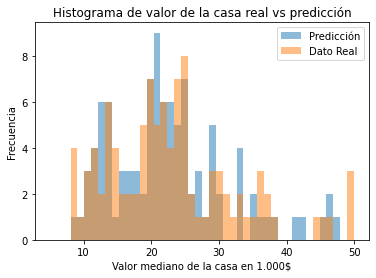

In [58]:
bins = np.linspace(5, 50, 45)
plt.hist(predictions, bins, alpha = 0.5, label = "Predicción")
plt.hist(y_batch, bins, alpha = 0.5, label = "Dato Real")
plt.title("Histograma de valor de la casa real vs predicción")
plt.xlabel("Valor mediano de la casa en 1.000$")
plt.ylabel("Frecuencia")
plt.legend(loc="upper right")
plt.show()

In [0]:
def knn(k):
    batch_size = len(x_vals_test)

    top_k_xvals, top_k_idx = tf.nn.top_k(tf.negative(distance), k = k)
    x_sums = tf.expand_dims(tf.reduce_sum(top_k_xvals,1),1)
    x_sums_rep = tf.matmul(x_sums, tf.ones([1,k], tf.float32))
    x_vals_w = tf.expand_dims(tf.divide(top_k_xvals, x_sums_rep),1) # -> wi = di / \sum(dj)
    
    top_k_yvals = tf.gather(y_target_train, top_k_idx)
    prediction = tf.squeeze(tf.matmul(x_vals_w, top_k_yvals),axis=[1]) ## \sum w_i y_i
    
    mse = tf.div(tf.reduce_sum(tf.square(tf.subtract(prediction, y_target_test))), batch_size)
    
    min_idx = i*batch_size
    max_idx = min((i+1)*batch_size, len(x_vals_train))
    x_batch = x_vals_test[min_idx:max_idx]
    y_batch = y_vals_test[min_idx:max_idx]
    
    predictions = session.run(prediction, feed_dict={x_data_train: x_vals_train, x_data_test: x_batch,
                                         y_target_train: y_vals_train, y_target_test: y_batch})
    batch_mse = session.run(mse, feed_dict={x_data_train: x_vals_train, x_data_test: x_batch,
                                         y_target_train: y_vals_train, y_target_test: y_batch})
    
    return batch_mse

In [61]:
mse_k = []
for k in range(2,30):
    mse_t = knn(k)
    mse_k.append(mse_t)
    print(str(k)+", MSE="+str(mse_t))

2, MSE=14.243838
3, MSE=13.9705925
4, MSE=11.87519
5, MSE=14.33558
6, MSE=15.934032
7, MSE=14.20857
8, MSE=17.382902
9, MSE=18.969704
10, MSE=19.679918
11, MSE=21.505524
12, MSE=21.569881
13, MSE=22.133728
14, MSE=23.344776
15, MSE=24.815277
16, MSE=25.026796
17, MSE=25.113691
18, MSE=26.110455
19, MSE=27.285666
20, MSE=28.032291
21, MSE=28.254145
22, MSE=28.794472
23, MSE=29.372278
24, MSE=29.72252
25, MSE=29.947369
26, MSE=30.083986
27, MSE=29.9278
28, MSE=30.298416
29, MSE=30.547873


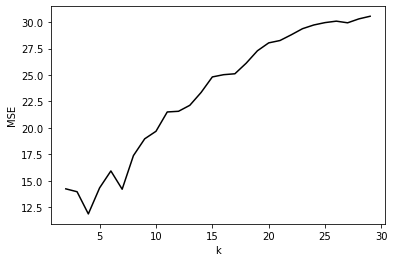

In [62]:
plt.plot(range(2,30), mse_k, 'k-', label="MSE")
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()